In [21]:
import sqlite3
import pandas as pd

In [22]:
# Load the csv file data into dataframe
df = pd.read_csv('data/heart.csv')

In [23]:
# Connect to SQLite database 'heart_disease.db'
conn = sqlite3.connect('heart_disease.db')

In [24]:
# Write the data from dataframe to SQLite database table 'heart_data' 
# If table 'heart_data' exists, replace it with new data. 
df.to_sql('heart_data', conn, if_exists='replace', index=False)


303

In [25]:
# Create a cursor object
cursor = conn.cursor()
# Execute query on SQLite database to fetch first 5 rows from 'heart_data' table
cursor.execute("SELECT * FROM heart_data LIMIT 5")
rows = cursor.fetchall()
for row in rows:
    print(row)

('63;1;3;145;233;1;0;150;0;2.3;0;0;1;1',)
('37;1;2;130;250;0;1;187;0;3.5;0;0;2;1',)
('41;0;1;130;204;0;0;172;0;1.4;2;0;2;1',)
('56;1;1;120;236;0;1;178;0;0.8;2;0;2;1',)
('57;0;0;120;354;0;1;163;1;0.6;2;0;2;1',)


In [26]:
# Close the connection
conn.close()

In [27]:
# Reconnect Question 2
conn = sqlite3.connect('heart_disease.db')

# Load the data from the SQLite table
df = pd.read_sql_query("SELECT * FROM heart_data", conn)


# Display the first few rows of the dataframe
df.head()


,age;sex;cp;trestbps;chol;fbs;restecg;thalach;exang;oldpeak;slope;ca;thal;target
0,63;1;3;145;233;1;0;150;0;2.3;0;0;1;1
1,37;1;2;130;250;0;1;187;0;3.5;0;0;2;1
2,41;0;1;130;204;0;0;172;0;1.4;2;0;2;1
3,56;1;1;120;236;0;1;178;0;0.8;2;0;2;1
4,57;0;0;120;354;0;1;163;1;0.6;2;0;2;1


In [28]:
# Load the CSV file with the correct delimiter
df = pd.read_csv('data/heart.csv', delimiter=';')

# Display the first few rows of the dataframe
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Convert columns to numeric, forcing errors to be handled
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with any NaN values
df_cleaned = df.dropna()

# Check data types again
print(df_cleaned.dtypes)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [30]:
from sklearn.preprocessing import MinMaxScaler

# List of numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_columns)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Display the first few rows of the cleaned and normalized dataframe
df_cleaned.head()


Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [31]:
# Convert columns to numeric, forcing errors to be handled
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with any NaN values
df_cleaned = df.dropna()

# Check data types again
print(df_cleaned.dtypes)

# List of numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric columns:", numeric_columns)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numeric columns
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

# Display the first few rows of the cleaned and normalized dataframe
df_cleaned.head()


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


Column names: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


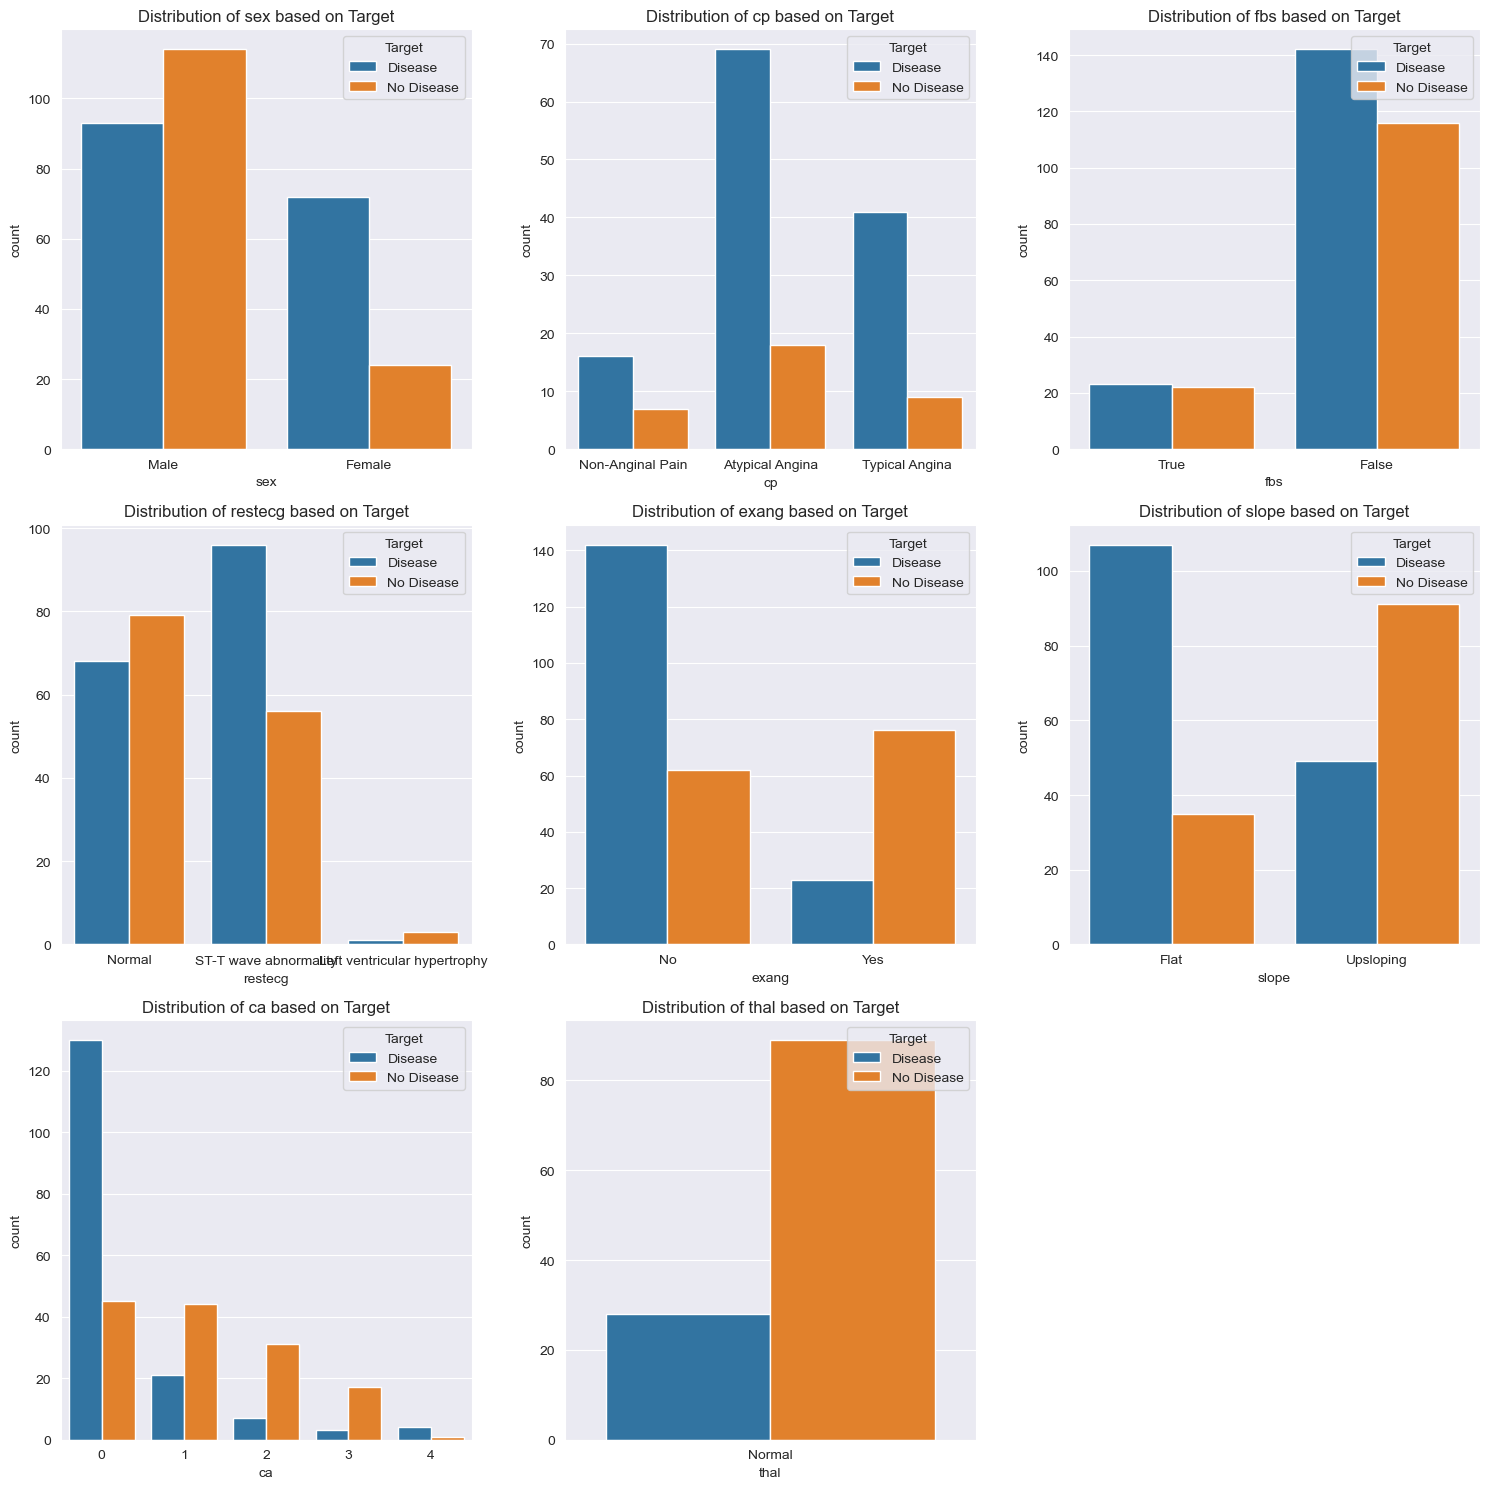

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the dataset
df_cleaned = pd.read_csv('data/heart.csv', delimiter=';')

# Print column names for verification
print("Column names:", df_cleaned.columns)

# Define mappings for categorical variables
mappings = {
    'sex': {0: 'Female', 1: 'Male'},
    'cp': {1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Anginal Pain', 4: 'Asymptomatic'},
    'fbs': {0: 'False', 1: 'True'},
    'restecg': {0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Left ventricular hypertrophy'},
    'exang': {0: 'No', 1: 'Yes'},
    'slope': {1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'},
    'thal': {3: 'Normal', 6: 'Fixed Defect', 7: 'Reversible Defect'},
    'target': {0: 'No Disease', 1: 'Disease'}
}

# Apply mappings to the dataframe
for column, mapping in mappings.items():
    if column in df_cleaned.columns:
        df_cleaned[column] = df_cleaned[column].map(mapping)
    else:
        print(f"'{column}' column not found in the dataset.")

# List of categorical columns to plot
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Loop through each categorical column and create a subplot
for i, column in enumerate(categorical_columns, 1):
    if column in df_cleaned.columns:
        plt.subplot(3, 3, i)
        sns.countplot(data=df_cleaned, x=column, hue='target')
        plt.title(f'Distribution of {column} based on Target')
        plt.legend(title='Target', loc='upper right')
    else:
        print(f"'{column}' column not found in the dataset.")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


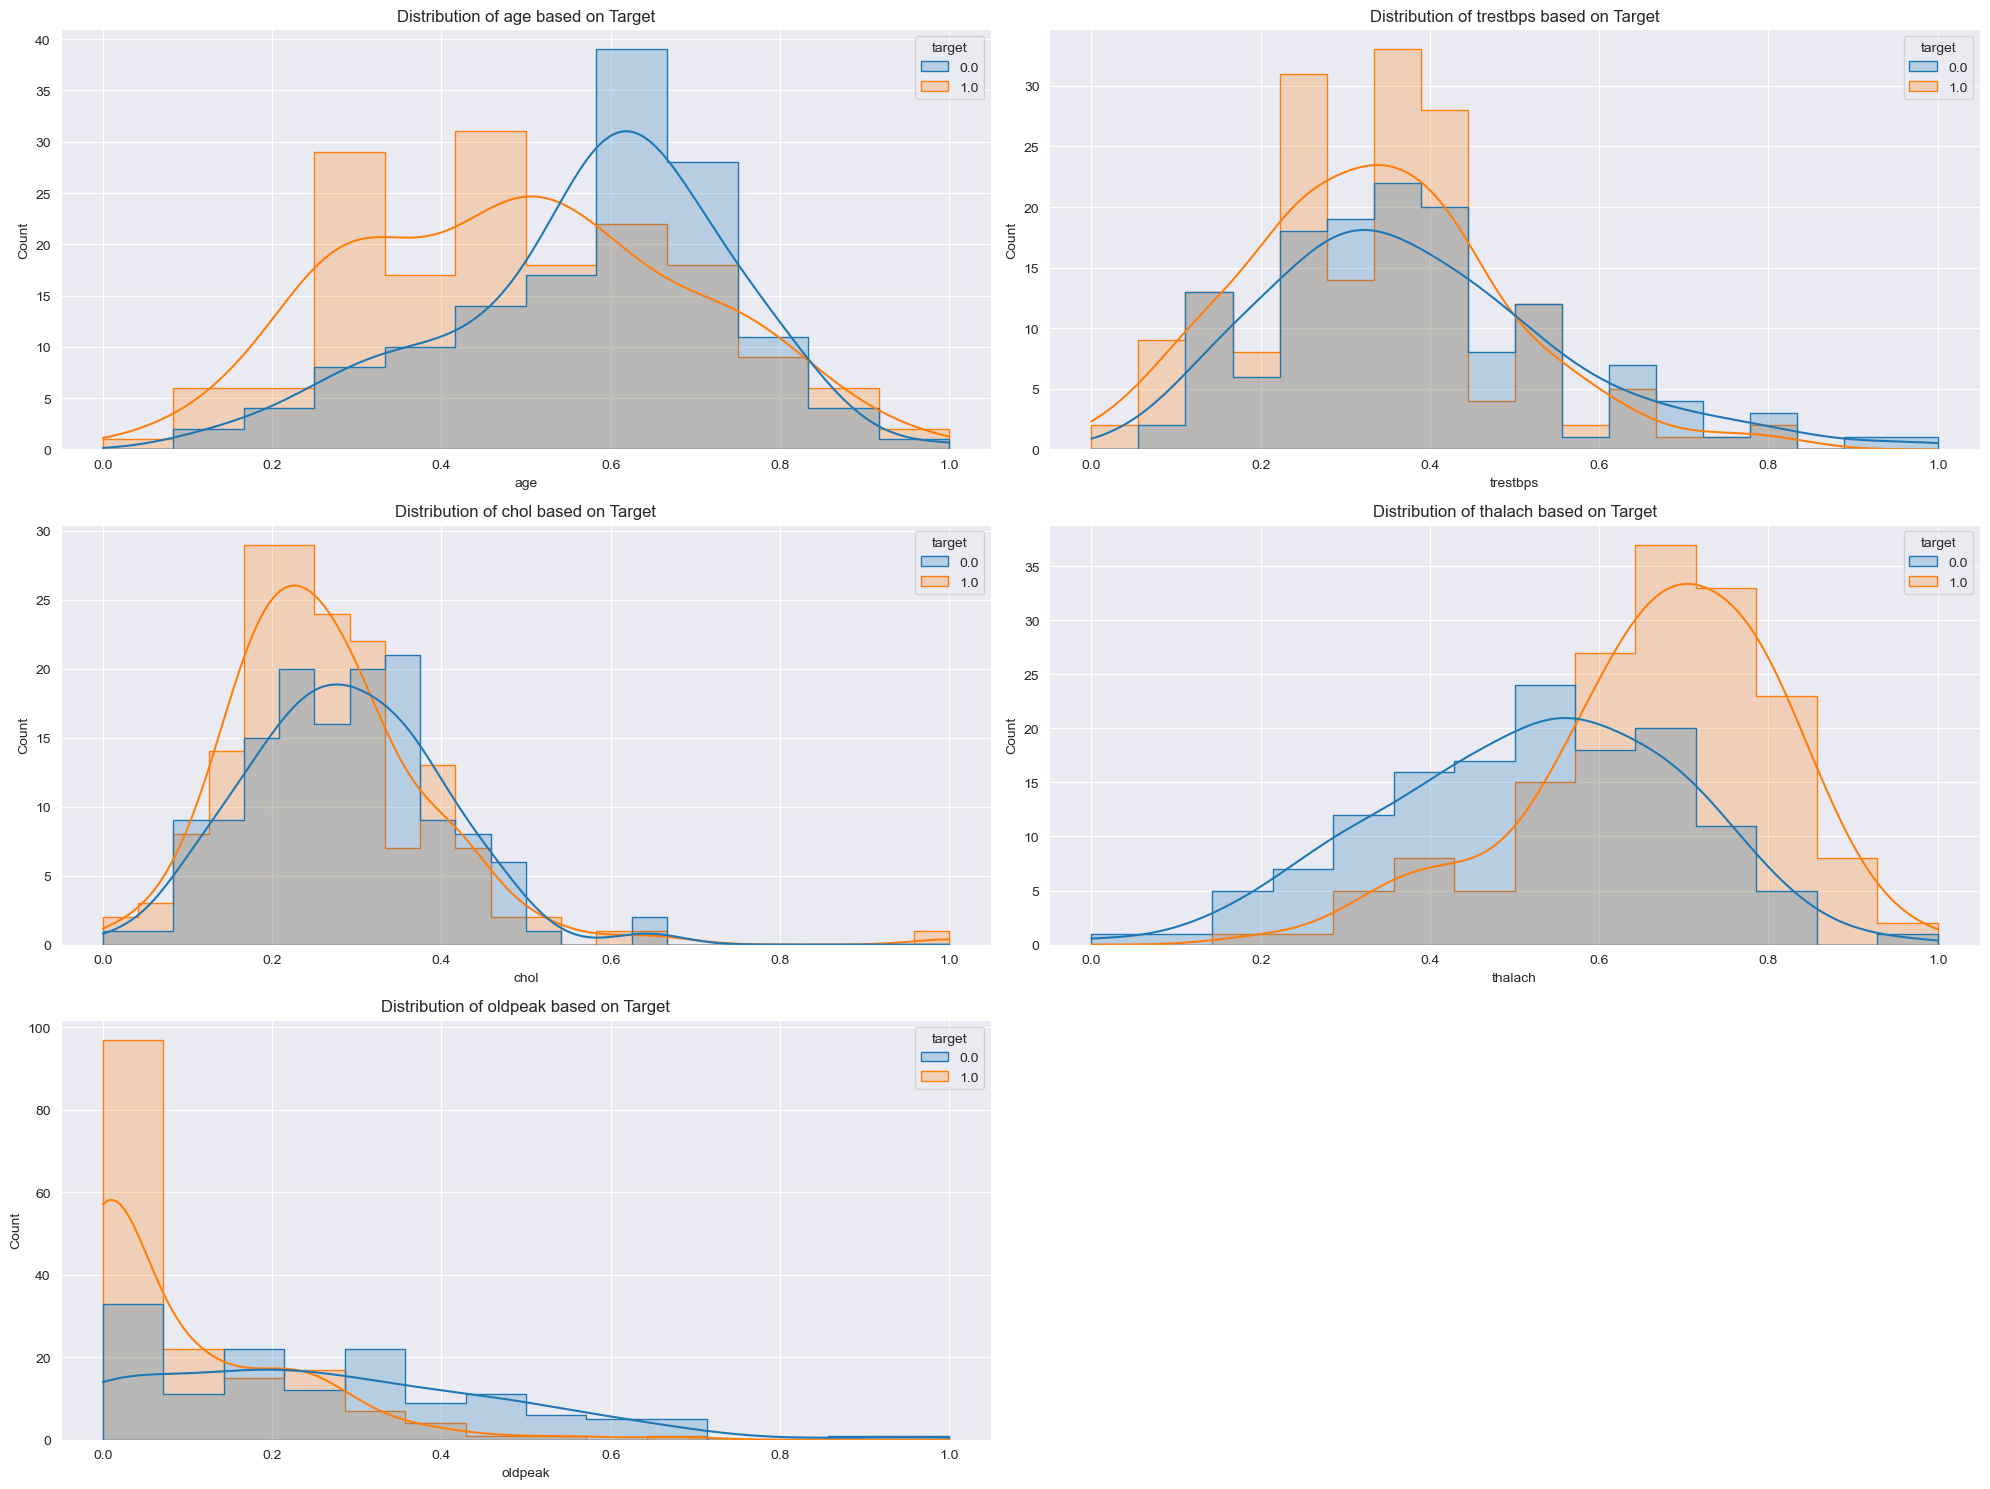

In [33]:
# Question 2 C
# List of numeric columns
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through each numeric column and create a subplot
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df_cleaned, x=column, hue='target', kde=True, element='step')
    plt.title(f'Distribution of {column} based on Target')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
# Close  connection
conn.close()


In [34]:
#Question 3.1
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (242, 13)
X_test shape: (61, 13)
y_train shape: (242,)
y_test shape: (61,)


In [35]:
#Question 3.2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC()

# Train the models
log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Perform predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate the models
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(classification_report(y_test, y_pred_log_reg))

print("Random Forest:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_random_forest)}')
print(classification_report(y_test, y_pred_random_forest))

print("Support Vector Machine:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(classification_report(y_test, y_pred_svm))


Logistic Regression:
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        29
         1.0       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Random Forest:
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        29
         1.0       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Support Vector Machine:
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83        29
         1.0       0.87      0.81      0.84        32

    accuracy                       

In [36]:
# Logistic Regression
print("Logistic Regression:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85        29
         1.0       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [37]:
#  Random Forest
print("Random Forest:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_random_forest)}')
print(classification_report(y_test, y_pred_random_forest))


Random Forest:
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        29
         1.0       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


# Check data types again
print(df_cleaned.dtypes)

# Assuming the target variable is 'target' and features are all other columns
X = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Adjust the threshold
threshold = 0.3  # Example threshold, you can adjust this
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object
Confusion Matrix:
[[25  4]
 [ 3 29]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88        29
         1.0       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [38]:
#Question 3.2 end
import joblib

# Save the Logistic Regression model to a file
joblib.dump(log_reg, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [42]:
import joblib
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']